In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from IPython import display
from ipywidgets import interact, widgets

In [4]:
plt.style.use('seaborn-notebook')

In [13]:
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [14]:
ConfirmedCases=ConfirmedCases_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Cases',var_name='Date')
ConfirmedCases['Region']=np.where(ConfirmedCases['Country/Region']=='Mainland China','Mainland China','Outside China')

In [15]:
ConfirmedCases

,Province/State,Country/Region,Lat,Long,Date,Cases,Region
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,0,Mainland China
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,0,Mainland China
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,0,Mainland China
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,0,Mainland China
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,Mainland China
...,...,...,...,...,...,...,...
5776,"Placer County, CA",US,39.0916,-120.8039,3/2/20,0,Outside China
5777,"San Mateo, CA",US,37.5630,-122.3255,3/2/20,0,Outside China
5778,"Sarasota, FL",US,27.3364,-82.5307,3/2/20,0,Outside China
5779,"Sonoma County, CA",US,38.5780,-122.9888,3/2/20,0,Outside China


In [16]:
ConfirmedCasesDeepDive=ConfirmedCases.set_index(['Country/Region','Province/State','Date'])

In [17]:
ConfirmedCasesDeepDive

Lat      Long  Cases  \
Country/Region Province/State    Date                                
Mainland China Anhui             1/22/20  31.8257  117.2264      0   
               Beijing           1/22/20  40.1824  116.4142      0   
               Chongqing         1/22/20  30.0572  107.8740      0   
               Fujian            1/22/20  26.0789  117.9874      0   
               Gansu             1/22/20  36.0611  103.8343      0   
...                                           ...       ...    ...   
US             Placer County, CA 3/2/20   39.0916 -120.8039      0   
               San Mateo, CA     3/2/20   37.5630 -122.3255      0   
               Sarasota, FL      3/2/20   27.3364  -82.5307      0   
               Sonoma County, CA 3/2/20   38.5780 -122.9888      0   
               Umatilla, OR      3/2/20   45.7750 -118.7606      0   

                                                  Region  
Country/Region Province/State    Date                     
Mainland China Anhui             1/22/20  Mainland China  
               Beijing           1/22/20  Mainland China  
               Chongqing         1/22/20  Mainland China  
               Fujian            1/22/20  Mainland China  
               Gansu             1/22/20  Mainland China  
...                                                  ...  
US             Placer County, CA 3/2/20    Outside China  
               San Mateo, CA     3/2/20    Outside China  
               Sarasota, FL      3/2/20    Outside China  
               Sonoma County, CA 3/2/20    Outside China  
               Umatilla, OR      3/2/20    Outside China  

[5781 rows x 4 columns]

In [18]:
# Confirmed Cases by Region
ConfirmedCasesRegion=ConfirmedCasesDeepDive.groupby(['Date','Region'])['Cases'].sum().reset_index()
ConfirmedCasesRegion=ConfirmedCasesRegion.set_index('Date')
ConfirmedCasesRegion.index=pd.to_datetime(ConfirmedCasesRegion.index)

In [19]:
ConfirmedCasesRegion.to_csv('Recovered.csv')

AttributeError: 'Line2D' object has no property 'legend'

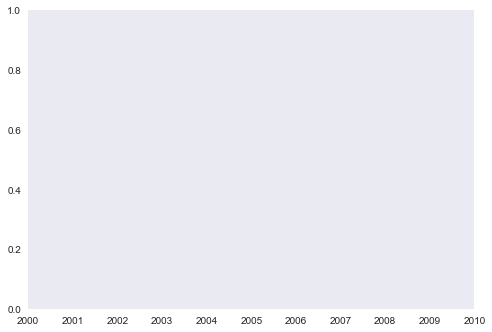

In [342]:
#ConfirmedCasesRegion=ConfirmedCasesRegion.pivot(columns='Region',values='Cases').reset_index()
plt.plot(ConfirmedCasesRegion['Date'],ConfirmedCasesRegion['Mainland China'],legend=True)
plt.plot(ConfirmedCasesRegion['Date'],ConfirmedCasesRegion['Outside China'])
plt.legend()

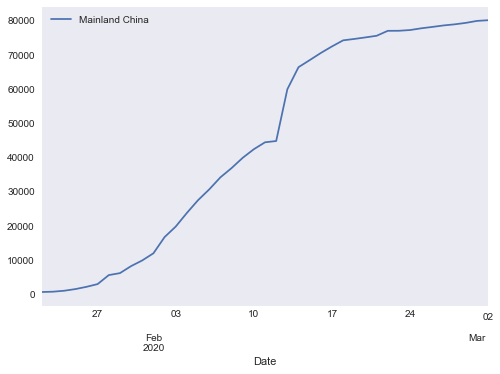

In [333]:
ConfirmedCasesRegion.plot(kind='line',x='Date',y='Mainland China')

In [331]:
#Confirmed Cases by Region (Inside or Outside China)
ConfirmedCasesCountry=ConfirmedCasesDeepDive.groupby(['Country/Region','Date','Region'])['Cases'].sum().reset_index()
ConfirmedCasesCountry=ConfirmedCasesCountry.set_index('Date')
ConfirmedCasesCountry.index=pd.to_datetime(ConfirmedCasesCountry.index)

Text(0.5, 0, '')

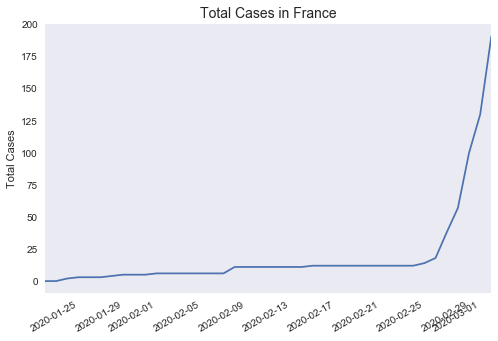

In [332]:
### Cases for a Specific Country
Country='France'
title='Total Cases in ' + Country
ConfirmedCasesCountry[ConfirmedCasesCountry.loc[:,'Country/Region']==Country].plot(kind='line',y='Cases',legend=False)
plt.title(title,fontsize='14')
plt.ylabel('Total Cases')
plt.xlabel('')